In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [2]:
data = pd.read_csv('../data(S1).csv', index_col=False)
data

,imagePath,label,Shape_num,width,height,point1_x,point1_y,point2_x,point2_y
0,3403540,pack,1,2272,4032,926,1682,1248,2284
1,3403658,can,1,2272,4032,999,1701,1295,2224
2,3403788,glass,1,4032,2272,1435,972,2672,1185
3,3403841,paper,1,2268,4032,860,1663,1515,2419
4,3403871,paper,1,2268,4032,861,1683,1493,2445
...,...,...,...,...,...,...,...,...,...
12470,custom_00227,vinyl,1,4032,2268,1312,421,2198,1569
12471,custom_00230,vinyl,1,2268,4032,700,1559,1639,2543
12472,custom_00285,glass,1,2268,4032,630,2882,1380,3243
12473,custom_00287,glass,1,2268,4032,621,2878,1372,3240


In [4]:
name = data.values[0][0]
type(name)

str

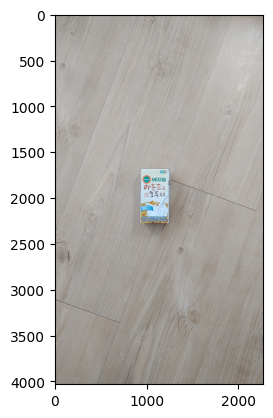

In [9]:
image_path = "E:/reusable-trash-images/selectstar-reusable-trash-image/" + name + ".jpg"
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [7]:
ratio_list=[]
for i in range(len(data.values)):
    
    name = str(data.values[i][0])
    image_path = "E:/reusable-trash-images/selectstar-reusable-trash-image/" + name + ".jpg"
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    x = data.values[i][5]
    y = data.values[i][6]
    w = data.values[i][7]
    h = data.values[i][8]
    dx = np.abs(w-x)
    dy = np.abs(h-y)
    s = dx*dy
    size = np.int32(image.size/3)
    ratio = s/size*100
    print(name,s,size,ratio)
    ratio_list.append(ratio)

3403540 193844 9160704 2.116038243348983
3403658 154808 9160704 1.689913788285267
3403788 263481 9160704 2.8762090773809526
3403841 495180 9144576 5.415013227513228
3403871 481584 9144576 5.266334929033341
3403971 840224 9144576 9.18822261414854
3404044 584748 11943936 4.895773051697531
3404065 148694 9144576 1.6260349304330786
3404070 175380 9144576 1.91785819265978
3404106 480704 9144576 5.25671173819322
3404111 1217690 9144576 13.315980970577531
3404138 110376 9144576 1.2070105820105819
3404188 267883 9144576 2.9294195816186557
3404200 180440 9160704 1.9697176112228927
3404245 175066 9144576 1.9144244632009182
3404247 104960 9160704 1.1457634697071317
3404277 695040 9144576 7.600571092634585
3404282 1243180 9144576 13.594725441616976
3404290 61752 9160704 0.6740966633132126
3404346 833490 9144576 9.114583333333332
3404349 305293 9144576 3.338514546765208
3404385 254282 9144576 2.7806866059180875
3404388 969984 9144576 10.607205845301083
3404394 140812 9144576 1.5398417597491671
3404

In [11]:
ratio_list = np.round(ratio_list,2)


In [8]:
len(ratio_list)

12475

In [12]:
data['ascept_ratio']=ratio_list

In [13]:
data

,imagePath,label,Shape_num,width,height,point1_x,point1_y,point2_x,point2_y,ascept_ratio
0,3403540,pack,1,2272,4032,926,1682,1248,2284,2.12
1,3403658,can,1,2272,4032,999,1701,1295,2224,1.69
2,3403788,glass,1,4032,2272,1435,972,2672,1185,2.88
3,3403841,paper,1,2268,4032,860,1663,1515,2419,5.42
4,3403871,paper,1,2268,4032,861,1683,1493,2445,5.27
...,...,...,...,...,...,...,...,...,...,...
12470,custom_00227,vinyl,1,4032,2268,1312,421,2198,1569,11.12
12471,custom_00230,vinyl,1,2268,4032,700,1559,1639,2543,10.10
12472,custom_00285,glass,1,2268,4032,630,2882,1380,3243,2.96
12473,custom_00287,glass,1,2268,4032,621,2878,1372,3240,2.97


In [15]:
data.to_csv("../data(S1+ratio).csv")

In [ ]:
""